<a href="https://colab.research.google.com/github/AbdullahAlTalaq/About-Me/blob/main/OpenCv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Learn How to use Keras for Modeling Linear Regression


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
Seed_Values = 42
# Fix seed to make training deterministic.

np.random.seed(Seed_Values)
tf.random.set_seed(Seed_Values)

In [ ]:
# Load the Boston housing dataset.
(X_train, y_train), (X_test, y_test)=boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
#store the feature data in a new variable.
boston_features ={
    "Average Number of Rooms":5
}
X_train_1d=X_train[:,boston_features["Average Number of Rooms"]]
X_test_1d = X_test[:,boston_features["Average Number of Rooms"]]

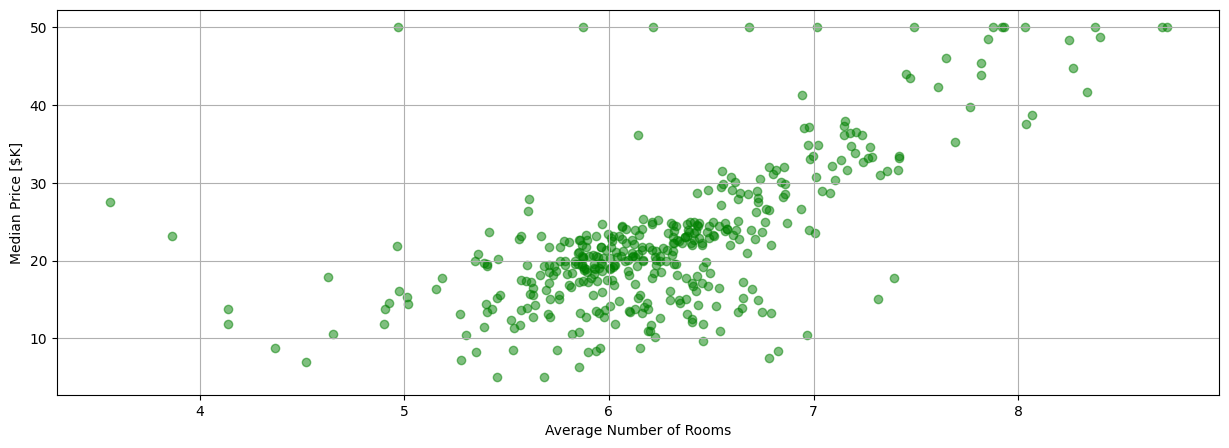

In [ ]:
plt.figure(figsize=(15,5))

plt.xlabel("Average Number of Rooms")
plt.ylabel("Median Price [$K]")
plt.grid("on")

plt.scatter(X_train_1d,y_train,color="green",alpha=0.5)

##Our goal

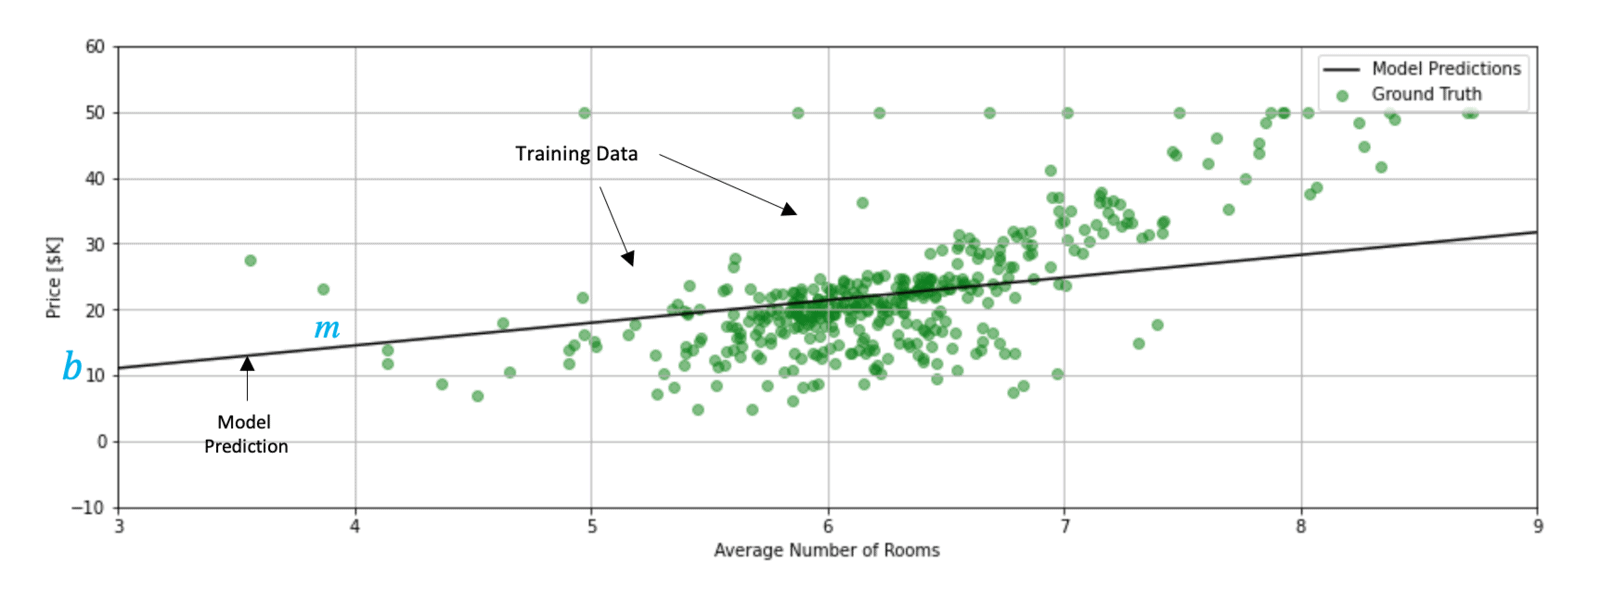

In [ ]:
from IPython.display import Image
Image('keras-linear-regression-model-plot.png')

The Loss Function we use can take many forms. For this example, we will use Mean Squared Error (MSE) which is a very common loss function used in regression problems.

The network contains just a single neuron that takes a single input (
x
) and produces a single output (
y
′
) which is the predicted (average) price of a home.

##Modeling a Neural Network in Keras

In [ ]:
model =Sequential()
# Define the model consisting of a single neuron
model.add(Dense(units=1,input_shape=(1,)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.005),loss='mse')

In [ ]:
history= model.fit(
  X_train_1d,
  y_train,
  batch_size=16,
  epochs=100,
  validation_split=0.3
)

Epoch 1/100
18/18 [==============================] - 0s 8ms/step - loss: 55.4219 - val_loss: 76.2954
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 55.3133 - val_loss: 76.1190
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 55.3001 - val_loss: 76.1251
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 55.3047 - val_loss: 76.1289
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 55.2767 - val_loss: 76.1367
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 55.3034 - val_loss: 76.1467
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 55.2747 - val_loss: 76.0364
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 55.2312 - val_loss: 76.0823
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 55.2317 - val_loss: 76.0735
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 55.2110 - val_los

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(20,5))
  plt.plot(history.history['loss'],'g',label='Training Loss')
  plt.plot(history.history['val_loss'],'b',label='Validation Loss')
  plt.xlim([0, 100])
  plt.ylim([0, 300])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

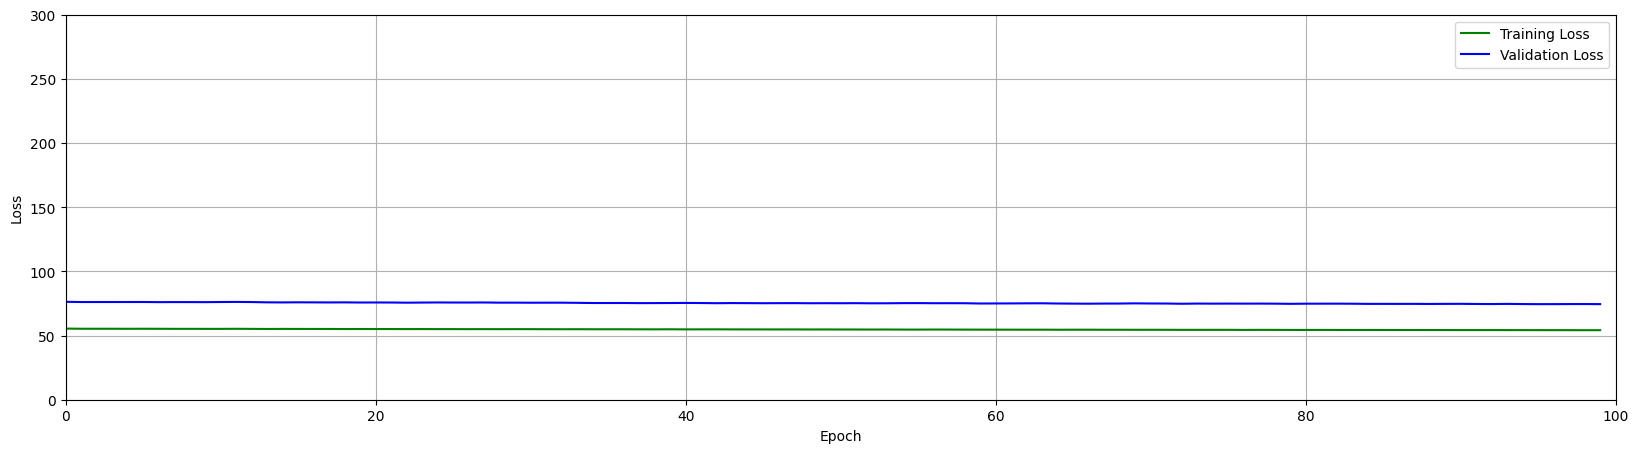

In [ ]:
plot_loss(history)

In [ ]:
 #Predict the median price of a home with [3, 4, 5, 6, 7] rooms.
x=[3,4,5,6,7]
y_pred = model.predict(x)
for idx in range(len(x)):
  print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")

1/1 [==============================] - 0s 75ms/step
Predicted price of a home with 3 rooms: $11.1K
Predicted price of a home with 4 rooms: $14.5K
Predicted price of a home with 5 rooms: $17.9K
Predicted price of a home with 6 rooms: $21.3K
Predicted price of a home with 7 rooms: $24.7K


<ipython-input-16-fb4330f80b77>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted price of a home with {x[idx]} rooms: ${int(y_pred[idx] * 10) / 10}K")


In [ ]:
# Generate feature data that spans the range of interest for the independent variable.
x = np.linspace(3,9,10)
# Use the model to predict the dependent variable.
y = model.predict(x)

1/1 [==============================] - 0s 51ms/step


In [ ]:
def plot_data(x_data,y_data,x,y, title=None):
  plt.figure(figsize=(15,5))
  plt.scatter(x_data, y_data, label='Ground Truth', color='green', alpha=0.5)
  plt.plot(x, y, color='k', label='Model Predictions')
  plt.xlim([3,9])
  plt.ylim([0,60])
  plt.xlabel('Average Number of Rooms')
  plt.ylabel('Price [$K]')
  plt.title(title)
  plt.grid(True)
  plt.legend()

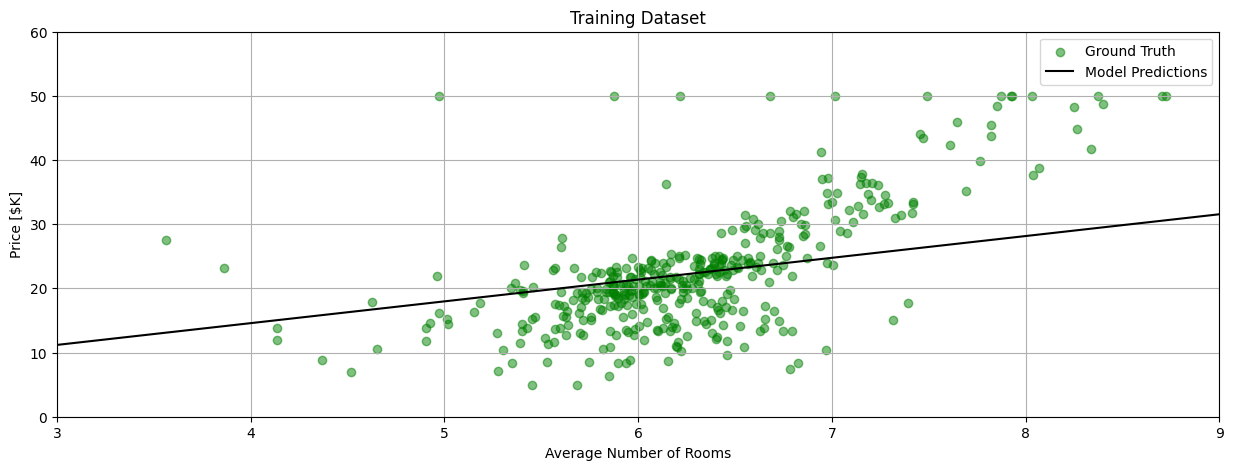

In [ ]:
plot_data(X_train_1d, y_train, x, y, title='Training Dataset')

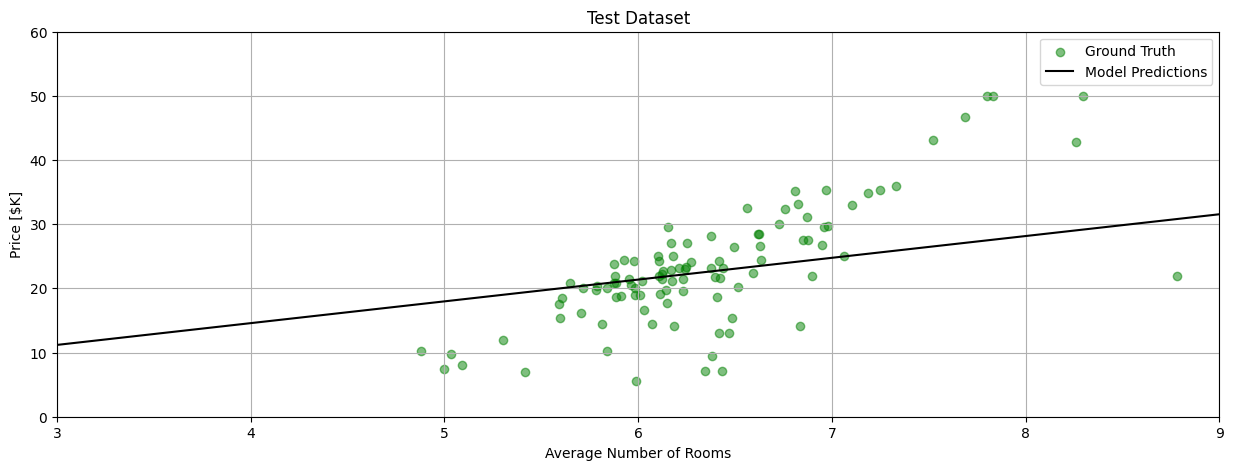

In [ ]:
plot_data(X_test_1d, y_test, x, y, title='Test Dataset')

In this notebok, we introduced the topic of linear regression in the context of a simple neural network. We showed how Keras can be used to model and train the network to learn the parameters of the linear model and how to visualize the model predictions.

#2